In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-time-series-20050101-to-20171231/PFE_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/TRV_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/JPM_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/GE_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/DIS_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/all_stocks_2017-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AABA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AXP_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PG_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-2005010

In [53]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,GRU,Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [68]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [55]:
dataset = pd.read_csv('../input/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [56]:
dataset.shape

(3020, 6)

In [57]:
training_set=dataset[:'2016'].iloc[:,1:2].values
test_set=dataset['2017':].iloc[:,1:2].values

In [58]:
print(test_set)

[[167.87]
 [169.87]
 [169.39]
 [169.92]
 [169.8 ]
 [168.09]
 [167.76]
 [168.01]
 [168.48]
 [168.18]
 [168.59]
 [167.45]
 [170.64]
 [171.25]
 [176.  ]
 [179.25]
 [178.88]
 [179.2 ]
 [177.07]
 [175.58]
 [175.7 ]
 [174.97]
 [176.34]
 [175.98]
 [178.62]
 [177.5 ]
 [177.8 ]
 [178.87]
 [179.9 ]
 [180.13]
 [181.92]
 [182.79]
 [181.57]
 [180.79]
 [181.34]
 [182.5 ]
 [181.49]
 [181.25]
 [180.63]
 [182.55]
 [181.88]
 [181.32]
 [180.99]
 [181.29]
 [180.95]
 [179.25]
 [179.49]
 [178.06]
 [176.82]
 [176.28]
 [179.  ]
 [176.79]
 [176.18]
 [176.23]
 [175.06]
 [175.67]
 [175.5 ]
 [174.16]
 [175.  ]
 [174.49]
 [174.59]
 [174.95]
 [174.87]
 [174.96]
 [176.33]
 [173.47]
 [172.93]
 [172.56]
 [171.23]
 [171.2 ]
 [171.36]
 [171.3 ]
 [171.69]
 [162.64]
 [162.4 ]
 [162.11]
 [161.57]
 [162.04]
 [161.1 ]
 [160.48]
 [160.59]
 [160.42]
 [159.49]
 [159.45]
 [159.14]
 [155.78]
 [153.47]
 [153.1 ]
 [152.37]
 [151.15]
 [151.26]
 [151.83]
 [153.99]
 [154.14]
 [151.33]
 [152.46]
 [152.84]
 [153.68]
 [152.76]
 [153.73]


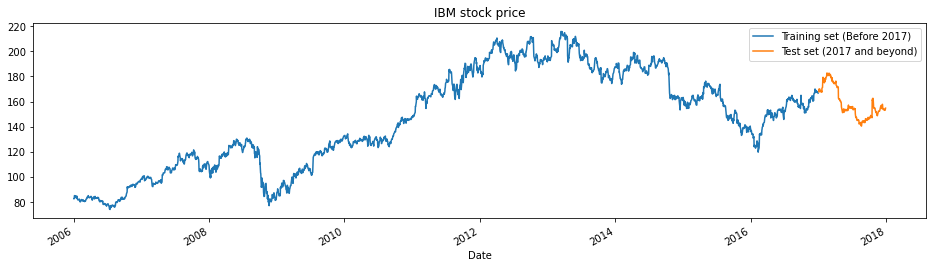

In [59]:
dataset['High'][:'2016'].plot(figsize=(16,4),legend=True)
dataset['High']['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [60]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [61]:
print(training_set_scaled.shape)

(2769, 1)


In [62]:
x_train=[]
y_train=[]
for i in range(60,2769):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
x_train=np.array(x_train)
y_train=np.array(y_train)


In [63]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [64]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=50,batch_size=32)


Epoch 1/50
85/85 [==============================] - 11s 133ms/step - loss: 0.0274
Epoch 2/50
85/85 [==============================] - 11s 129ms/step - loss: 0.0104
Epoch 3/50
85/85 [==============================] - 11s 130ms/step - loss: 0.0085
Epoch 4/50
85/85 [==============================] - 11s 130ms/step - loss: 0.0078
Epoch 5/50
85/85 [==============================] - 11s 131ms/step - loss: 0.0063
Epoch 6/50
85/85 [==============================] - 12s 139ms/step - loss: 0.0052
Epoch 7/50
85/85 [==============================] - 11s 131ms/step - loss: 0.0048
Epoch 8/50
85/85 [==============================] - 11s 129ms/step - loss: 0.0049
Epoch 9/50
85/85 [==============================] - 11s 129ms/step - loss: 0.0040
Epoch 10/50
85/85 [==============================] - 11s 133ms/step - loss: 0.0041
Epoch 11/50
85/85 [==============================] - 11s 133ms/step - loss: 0.0036
Epoch 12/50
85/85 [==============================] - 11s 133ms/step - loss: 0.0036
Epoch 13/50
8

In [65]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
print(len(dataset_total))
print(len(test_set))
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

3020
251
(311,)


In [66]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

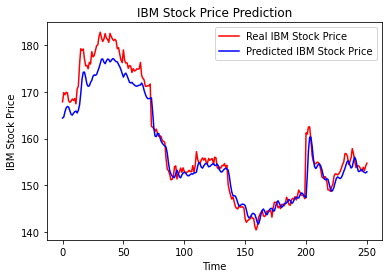

In [69]:
plot_predictions(test_set,predicted_stock_price)

In [77]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(x_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 4s 198ms/step - loss: 0.1347
Epoch 2/50
19/19 [==============================] - 4s 191ms/step - loss: 0.0479
Epoch 3/50
19/19 [==============================] - 4s 198ms/step - loss: 0.0145
Epoch 4/50
19/19 [==============================] - 4s 207ms/step - loss: 0.0056
Epoch 5/50
19/19 [==============================] - 4s 209ms/step - loss: 0.0047
Epoch 6/50
19/19 [==============================] - 4s 208ms/step - loss: 0.0043
Epoch 7/50
19/19 [==============================] - 4s 197ms/step - loss: 0.0040
Epoch 8/50
19/19 [==============================] - 4s 196ms/step - loss: 0.0037
Epoch 9/50
19/19 [==============================] - 4s 200ms/step - loss: 0.0034
Epoch 10/50
19/19 [==============================] - 4s 193ms/step - loss: 0.0034
Epoch 11/50
19/19 [==============================] - 4s 191ms/step - loss: 0.0032
Epoch 12/50
19/19 [==============================] - 4s 202ms/step - loss: 0.0032
Epoch 13/50
14/19 [======

KeyboardInterrupt: 

In [79]:
# Preparing X_test and predicting the prices
x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(x_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

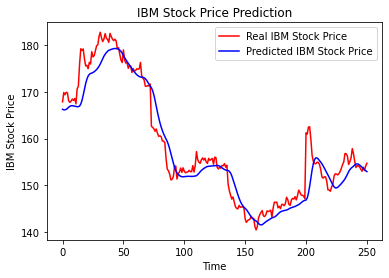

In [80]:
plot_predictions(test_set,GRU_predicted_stock_price)

In [81]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.4335757643965295.


In [82]:
initial_sequence = x_train[2708,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))

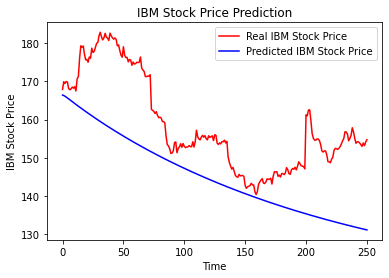

In [83]:
plot_predictions(test_set,sequence)

In [84]:
return_rmse(test_set,sequence)

The root mean squared error is 15.030386181645346.
